In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from pandas_datareader import data
import numpy as np 
#from yahoo_fin import stock_info as si
from dataanalyse import analyseData
import plotly.express as px 
import plotly.io as pio 
pio.renderers.default = "browser"
pd.set_option("display.max_columns", None)

In [155]:
# WHAT TIME PERIOD DO WE WANT WORK WITH?
#------------------------------------------------------------------
startDate = "2013-01-01"
endDate = "2021-03-01"
#thesis dates:  startDate ="2016-07-25" & endDate = "2020-04-30"

# TICKERS OF ETFs WE ARE GOING TO WORK WITH
#------------------------------------------------------------------

tickers = ['SPY','VGT','GLD','HDV',"QQQ","VUG","SCHA","USMV"]

tickers_crypt = ["BTC-USD","ETH-USD","XRP-USD","DOGE-USD", "LTC-USD","XLM-USD"]

"""
    ----------------------------------------------------------------------
    DATA ANALYTICS AND VISUALISATION 
    ----------------------------------------------------------------------
"""
# DOWNLOAD THE DATA FROM YAHOO DATABASE
#------------------------------------------------------------------
dailyPrices = data.DataReader(tickers, 'yahoo', startDate, endDate)
dailyPrices = dailyPrices["Adj Close"]


# ANALYSE THE DATA AND GET WEEKLY RETURNS  
#------------------------------------------------------------------


In [156]:
table = dailyPrices.fillna(0.0)

Text(0, 0.5, 'price in $')

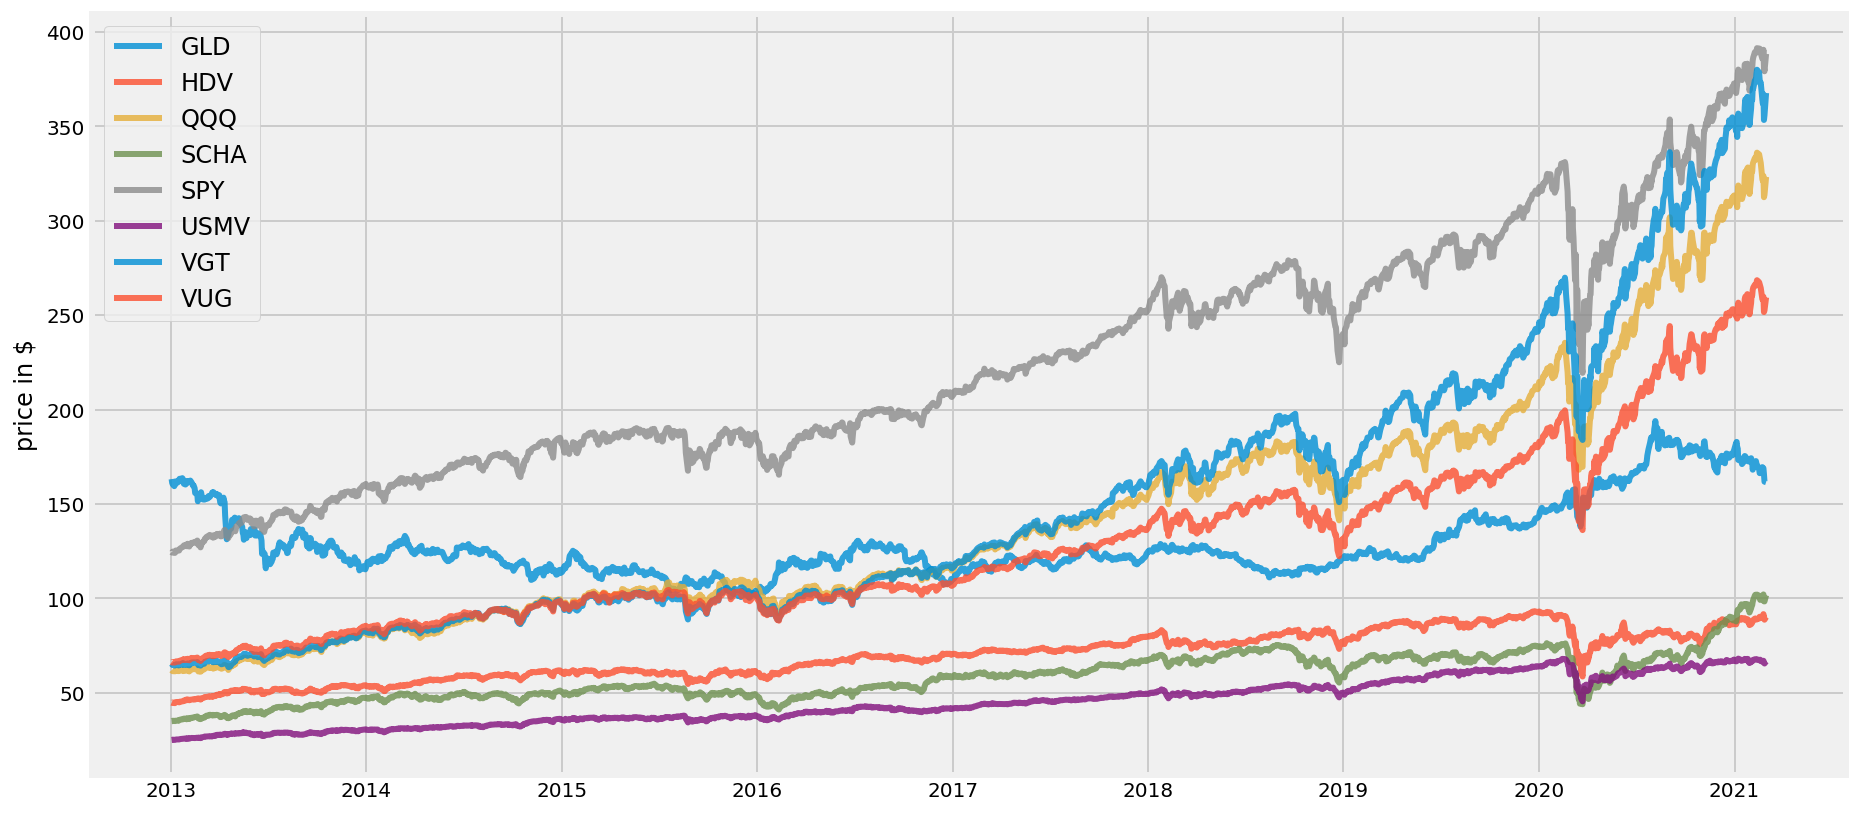

In [157]:
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'daily returns')

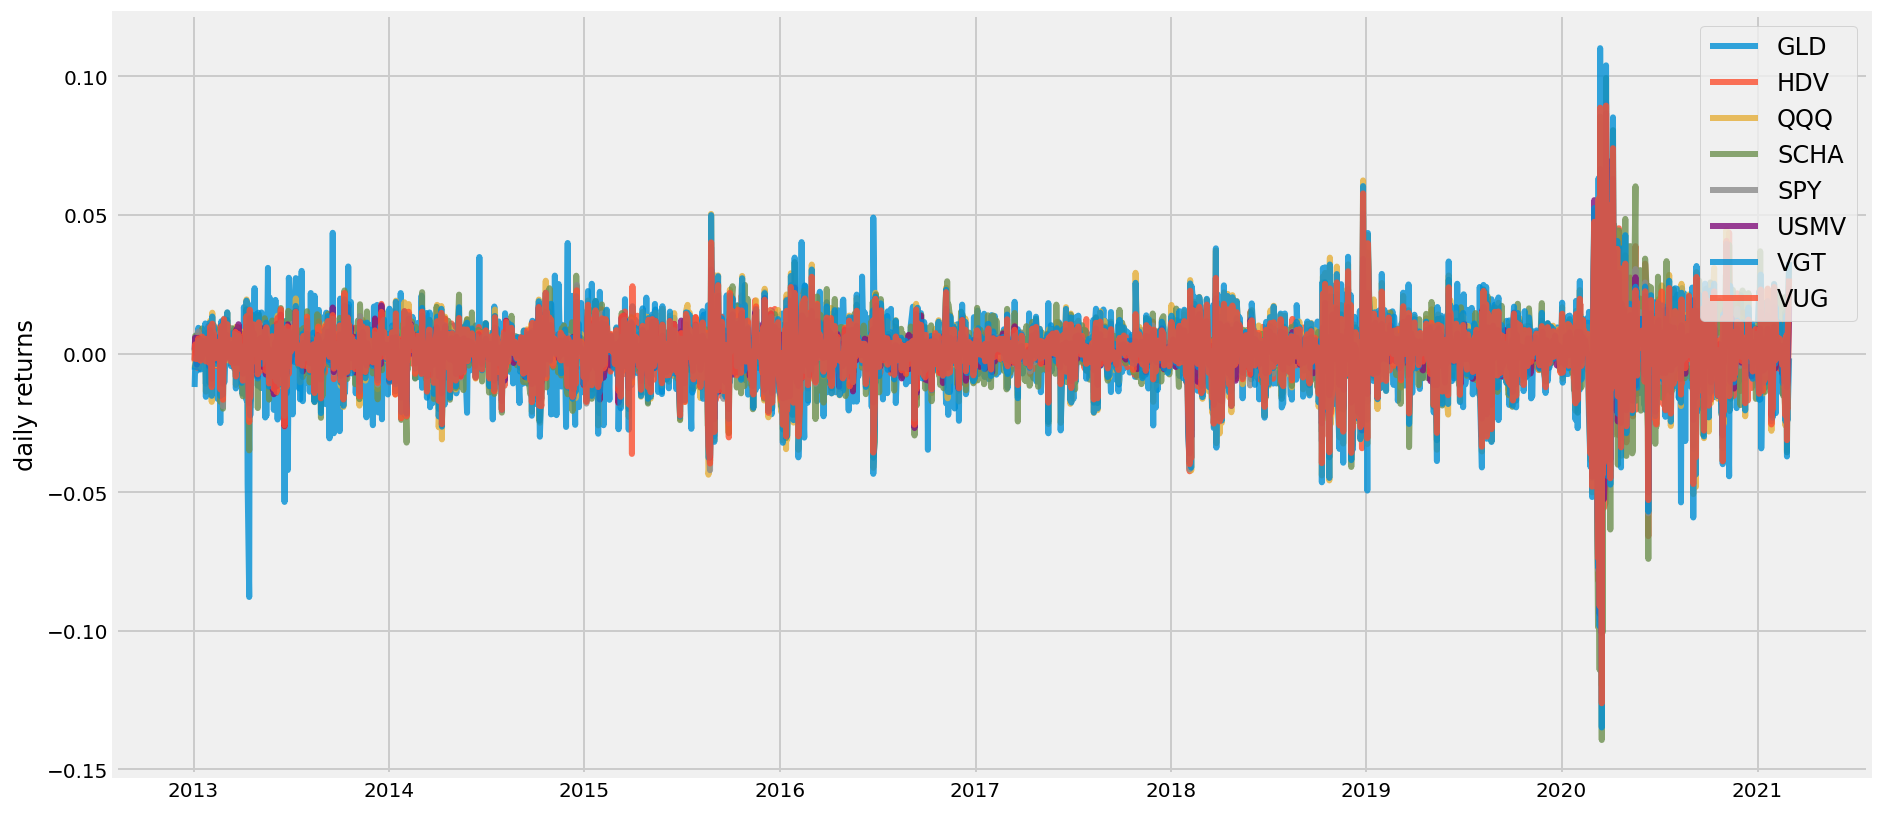

In [158]:
returns = table.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [329]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios-1):
        weights = np.random.random(8)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    weights_record.append(np.array([0.125,0.125, 0.125,0.125, 0.125,0.125, 0.125,0.125]))
    portfolio_std_dev, portfolio_return = portfolio_annualised_performance(np.array([0.125,0.125, 0.125,0.125, 0.125,0.125, 0.125,0.125]), mean_returns, cov_matrix)
    results[0,24999] = portfolio_std_dev
    results[1,24999] = portfolio_return
    results[2,24999] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [330]:
al = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)

In [331]:
np.shape(al[1])#[-1:]

(25000, 8)

In [332]:
al[1][-1:]

[array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])]

In [320]:
np.shape(al[0])

(3, 25000)

In [321]:
len(al[0][0])

25000

In [339]:
al[0][1][-1:]

array([0.14828836])

In [323]:
al[1].all(0.125)

AttributeError: 'list' object has no attribute 'all'

In [220]:
np.argwhere(al[1] =0.125)

SyntaxError: keyword can't be an expression (<ipython-input-220-af75cbcdbf06>, line 1)

In [217]:
np.shape(al[0])

(3, 25000)

In [233]:
np.argmin(al[0][2])

377

In [328]:
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

In [342]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    equal_idx = 24999
    sdp_eq, rp_eq = results[0,equal_idx], results[1,equal_idx]
    eq_allocation = pd.DataFrame(weights[equal_idx],index=table.columns,columns=['allocation'])
    eq_allocation.allocation = [round(i*100,2)for i in eq_allocation.allocation]
    eq_allocation = eq_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print( "Annualised Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Annualised Return:", round(rp_min,2))
    print( "Annualised Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    print( "-"*80)
    print( "Equal Weights Portfolio Allocation\n")
    print( "Annualised Return:", round(rp_eq,3))
    print( "Annualised Volatility:", round(sdp_eq,3))
    print( "\n")
    print( eq_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.scatter(sdp_eq,rp_eq,marker='*',color='purple',s=500, label='Equal weights')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.19
Annualised Volatility: 0.17


Symbols      GLD   HDV    QQQ  SCHA   SPY  USMV    VGT  VUG
allocation  8.97  4.34  49.18  2.41  6.37  1.29  26.94  0.5
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.08
Annualised Volatility: 0.11


Symbols       GLD    HDV   QQQ  SCHA   SPY   USMV   VGT  VUG
allocation  37.21  37.48  0.75   1.8  6.41  10.52  4.45  1.4
--------------------------------------------------------------------------------
Equal Weights Portfolio Allocation

Annualised Return: 0.148
Annualised Volatility: 0.15


Symbols      GLD   HDV   QQQ  SCHA   SPY  USMV   VGT   VUG
allocation  12.5  12.5  12.5  12.5  12.5  12.5  12.5  12.5


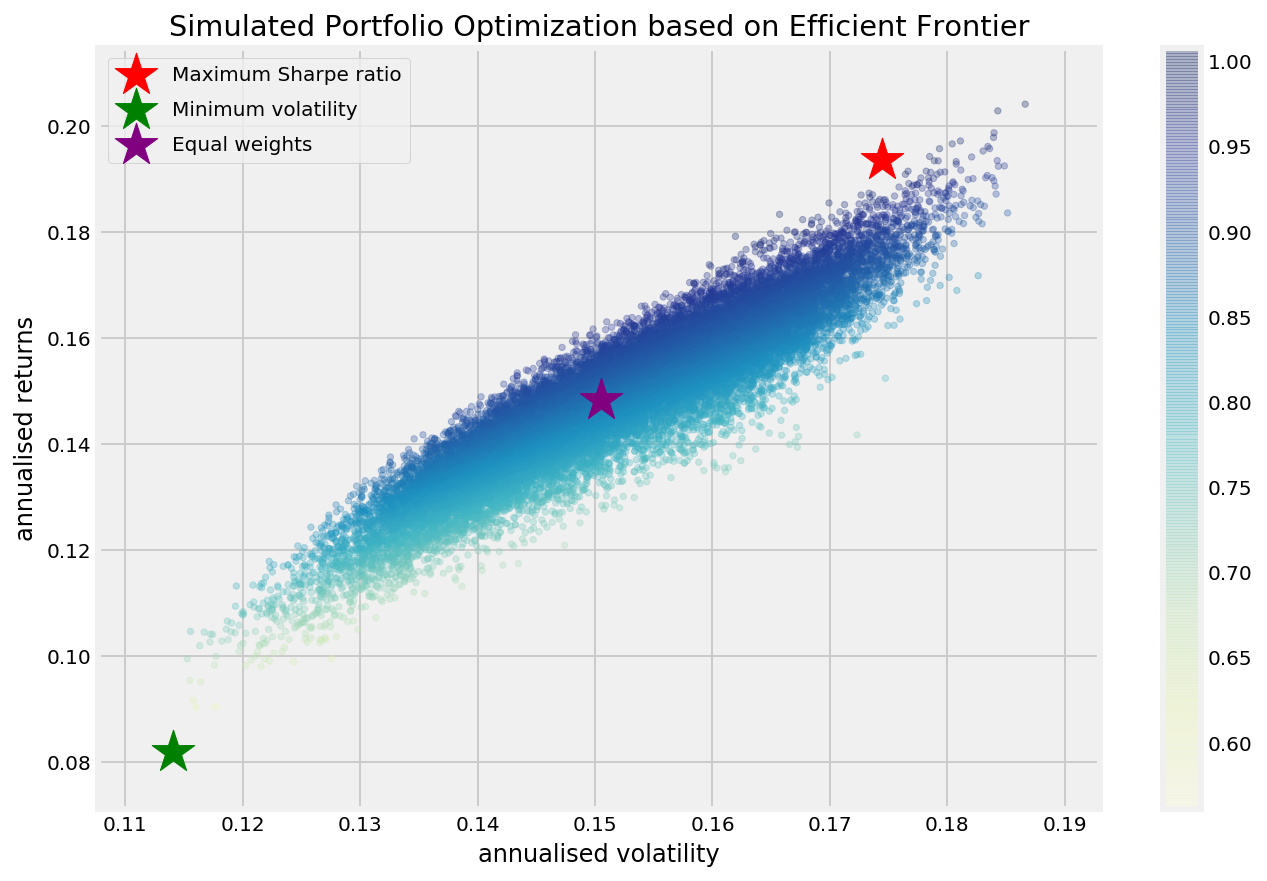

In [343]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [344]:
constraints = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [370]:
l=1.0
def markowitz(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -( (1- l)*p_ret - l*p_var )

def markowitz_opt(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(markowitz, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [371]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [372]:

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [373]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [374]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    markowitz = markowitz_opt(mean_returns, cov_matrix, risk_free_rate)
    sdp_mark, rp_mark = portfolio_annualised_performance(markowitz['x'], mean_returns, cov_matrix)
    markowitz_allocation = pd.DataFrame(markowitz.x,index=table.columns,columns=['allocation'])
    markowitz_allocation.allocation = [round(i*100,2)for i in markowitz_allocation.allocation]
    markowitz_allocation = markowitz_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print( "Annualised Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Annualised Return:", round(rp_min,2))
    print( "Annualised Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    print( "-"*80)
    print( "Markowitz Portfolio Allocation\n")
    print( "Annualised Return:", round(rp_mark,2))
    print( "Annualised Volatility:", round(sdp_mark,2))
    print( "\n")
    print( markowitz_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.scatter(sdp_mark,rp_mark,marker='*',color='y',s=500, label='Markowitz')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.23
Annualised Volatility: 0.2


Symbols     GLD  HDV   QQQ  SCHA  SPY  USMV   VGT  VUG
allocation  0.0  0.0  58.6   0.0  0.0   0.0  41.4  0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.07
Annualised Volatility: 0.11


Symbols       GLD   HDV  QQQ  SCHA  SPY   USMV  VGT  VUG
allocation  47.39  9.05  0.0   0.0  0.0  43.56  0.0  0.0
--------------------------------------------------------------------------------
Markowitz Portfolio Allocation

Annualised Return: 0.07
Annualised Volatility: 0.11


Symbols       GLD   HDV  QQQ  SCHA  SPY   USMV  VGT  VUG
allocation  47.39  9.05  0.0   0.0  0.0  43.56  0.0  0.0


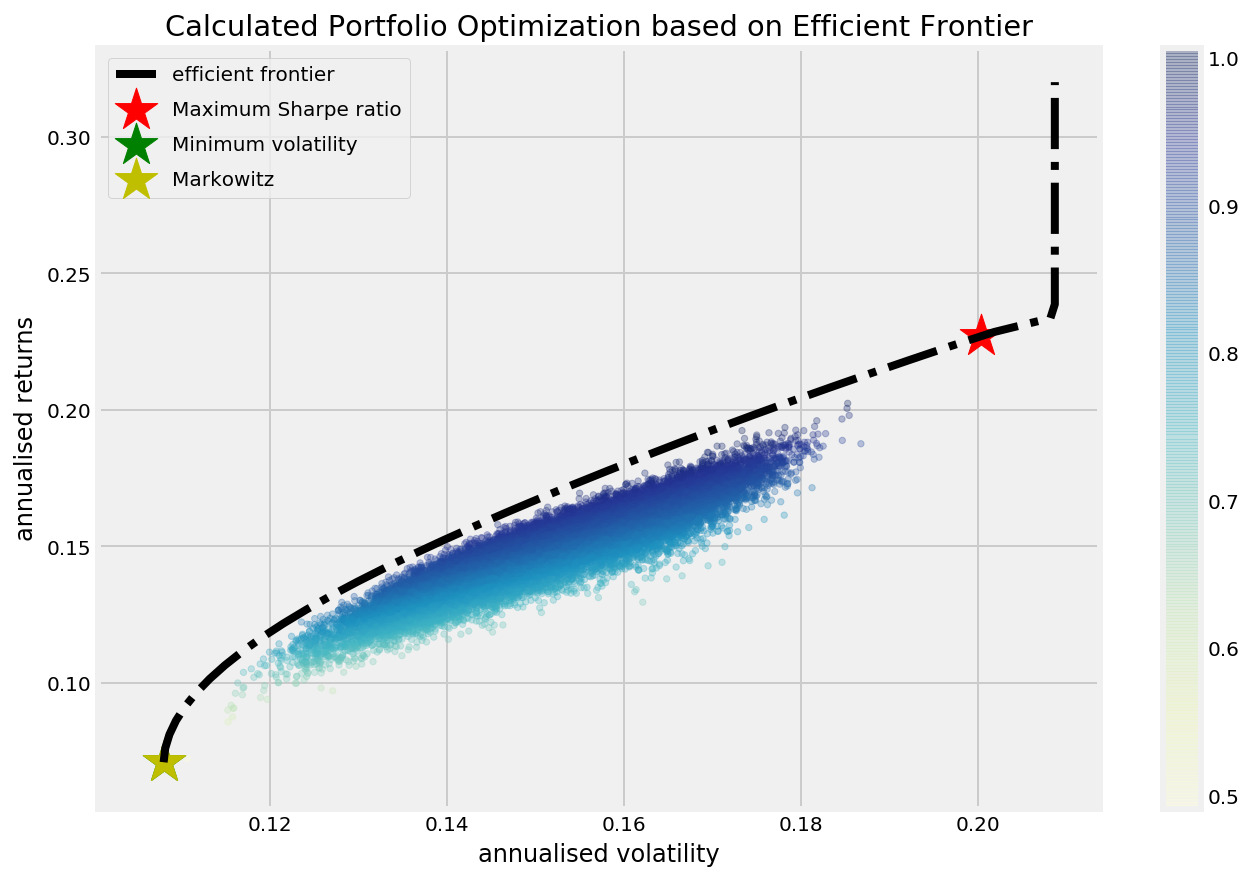

In [375]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [357]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    markowitz = markowitz_opt(mean_returns, cov_matrix, risk_free_rate)
    sdp_mark, rp_mark = portfolio_annualised_performance(markowitz['x'], mean_returns, cov_matrix)
    markowitz_allocation = pd.DataFrame(markowitz.x,index=table.columns,columns=['allocation'])
    markowitz_allocation.allocation = [round(i*100,2)for i in markowitz_allocation.allocation]
    markowitz_allocation = markowitz_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print( "Annualised Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Annualised Return:", round(rp_min,2))
    print( "Annualised Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    print( "-"*80)
    print( "Markowitz Portfolio Allocation\n")
    print( "Annualised Return:", round(rp_mark,2))
    print( "Annualised Volatility:", round(sdp_mark,2))
    print( "\n")
    print( markowitz_allocation)
    print( "-"*80)
    print( "Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(table.columns):
        print( txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print( "-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.scatter(sdp_mark,rp_mark,marker='*',color='y',s=500, label='Markowitz')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.23
Annualised Volatility: 0.2


Symbols     GLD  HDV   QQQ  SCHA  SPY  USMV   VGT  VUG
allocation  0.0  0.0  58.6   0.0  0.0   0.0  41.4  0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.07
Annualised Volatility: 0.11


Symbols       GLD   HDV  QQQ  SCHA  SPY   USMV  VGT  VUG
allocation  47.39  9.05  0.0   0.0  0.0  43.56  0.0  0.0
--------------------------------------------------------------------------------
Markowitz Portfolio Allocation

Annualised Return: 0.23
Annualised Volatility: 0.2


Symbols     GLD  HDV    QQQ  SCHA  SPY  USMV    VGT  VUG
allocation  0.0  0.0  50.26   0.0  0.0   0.0  49.74  0.0
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

GLD : annuaised retur

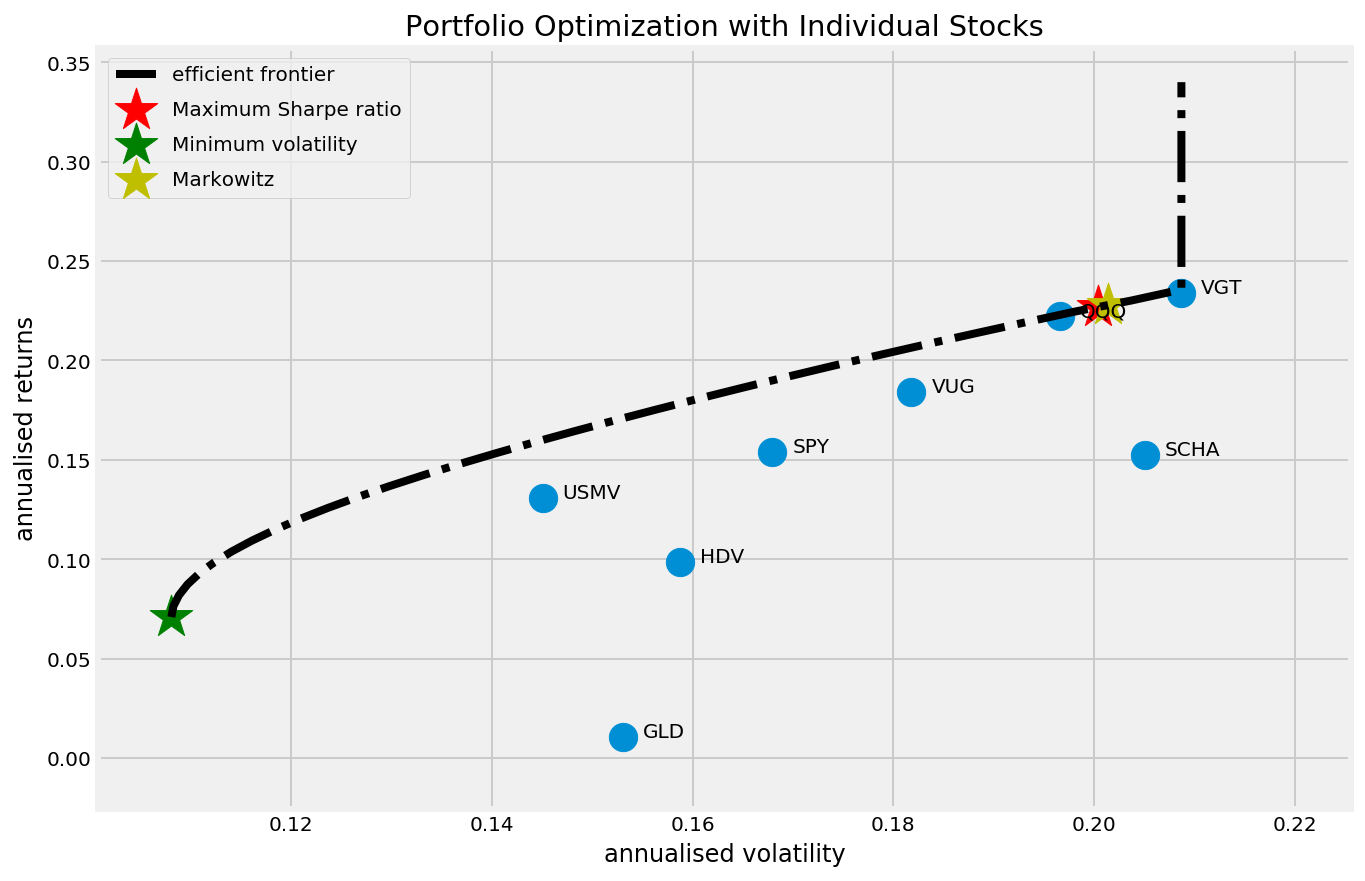

In [358]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)
